# Universal Approximation Theorem

Universal Approximation Theorem이란 1개의 비선형 Activation함수를 포함하고 있는 히든 레이어를 가진 Neural Network를 이용해 어떠한 함수든 근사시킬 수 있다는 이론.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
def func(x):
    """
    근사시키려는 함수
    의미없이 복잡하게 만든 함수
    """
    return 7*np.sin(x)*np.cos(x)*(2*x**2+5*x**3+x**2)*np.tan(x)+120 

In [3]:
x = np.linspace(-10, 10, 100)
y = func(x)

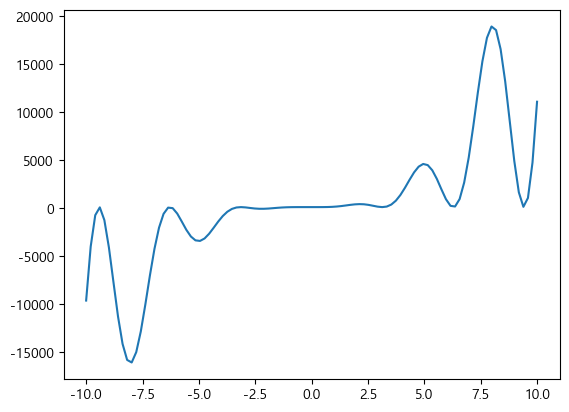

In [4]:
plt.plot(x, y)
plt.show()

In [5]:
X_train = torch.tensor(x, dtype=torch.float32).unsqueeze(dim=1).to(device)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(dim=1).to(device)

X_train.shape, y_train.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [19]:
# 모델
model = nn.Sequential(
    nn.Linear(1, 10000),
    nn.ReLU(),
    # nn.Sigmoid(),
    nn.Linear(10000, 1)
).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

In [20]:
# 학습
model.train()
for epoch in range(5000  ):
    # 추론
    pred = model(X_train)
    # 오차
    loss = loss_fn(pred, y_train)
    # grandient
    loss.backward()
    # 파라미터 업데이트
    optimizer.step()
    # 파라미터 초기화
    optimizer.zero_grad()
print("완료")

완료


In [21]:
y_pred = model(X_train)

In [22]:
# y_pred값을 ndarray로 변환
## 1. device를 cpu로 이동.
## 2. grad_fn 있는 경우 제거.
y_pred_array = y_pred.to("cpu").detach().numpy().flatten()

In [23]:
y_pred_array.shape

(100,)

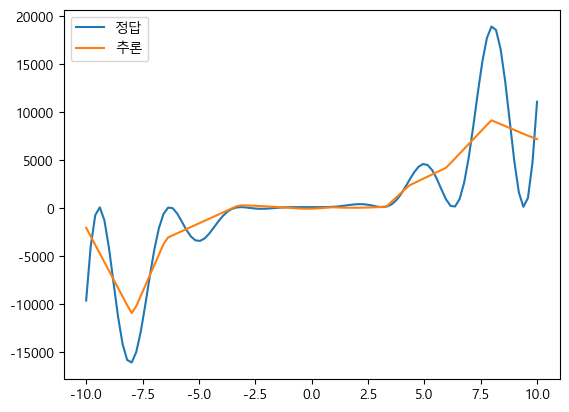

In [24]:
plt.plot(x, y, label="정답")
plt.plot(x, y_pred_array, label="추론")
plt.legend()
plt.show()